In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import datetime

import matplotlib.style as style
%matplotlib inline
style.use('seaborn-whitegrid')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [2]:
# load dataset
df = pd.read_csv('ZikaWithDensity.csv')
df.head()

,location,cases,density_per_km
0,Argentina-Buenos_Aires,793,12625.800781
1,Argentina-CABA,647,12625.800781
2,Argentina-Catamarca,59,460.153595
3,Argentina-Chaco,460,121.331650
4,Argentina-Chubut,47,37.095642


In [3]:
df[df['cases'] == 9389432 ]

,location,cases,density_per_km
1817,United_States-Puerto_Rico,9389432,1966.264526
1818,United_States-Puerto_Rico,9389432,1966.264526


In [4]:
df[df['density_per_km'] == 24970.1328125 ]

,location,cases,density_per_km
1658,Panama-Metro-Las_Garzas,19,24970.132812
1665,Panama-Metro-San_Felipe,39,24970.132812


In [5]:
df[df['cases'] == 9389432 ]

,location,cases,density_per_km
1817,United_States-Puerto_Rico,9389432,1966.264526
1818,United_States-Puerto_Rico,9389432,1966.264526


In [6]:
df.shape

(1836, 3)

In [7]:
# remove duplicate records
df.drop_duplicates(subset=None, keep='first',inplace=True)

In [8]:
df.shape

(1831, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1831 entries, 0 to 1835
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        1831 non-null   object 
 1   cases           1831 non-null   int64  
 2   density_per_km  1831 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 57.2+ KB


In [10]:
# check null values
df.isnull().sum()

location          0
cases             0
density_per_km    0
dtype: int64

In [11]:
df.describe()

,cases,density_per_km
count,1.831000e+03,1831.000000
mean,1.110681e+04,745.993820
std,2.231082e+05,2316.623384
min,0.000000e+00,0.002930
25%,1.000000e+01,29.627541
50%,1.450000e+02,70.991219
75%,1.141500e+03,212.629654
max,9.389432e+06,24970.132812


<AxesSubplot:xlabel='cases'>

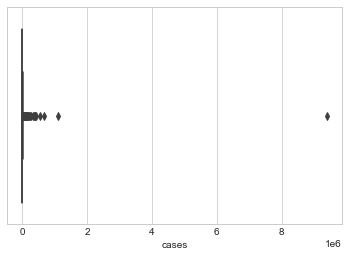

In [12]:
# plot outliers
sns.boxplot(x =df['cases'])

<AxesSubplot:xlabel='density_per_km'>

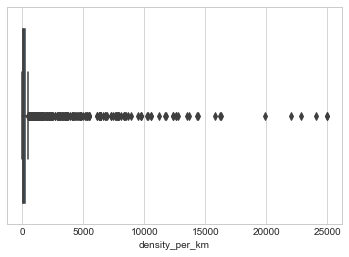

In [13]:
sns.boxplot(x =df['density_per_km'])

In [14]:
# Detecting outlier using Z-score
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [15]:
outlier_pt=detect_outliers(df['cases'])
outlier_pt

[1091664, 9389432]

In [16]:
# Handle outliers
df.drop(df[df['cases'] >= 1091664].index, inplace = True)

<AxesSubplot:xlabel='cases'>

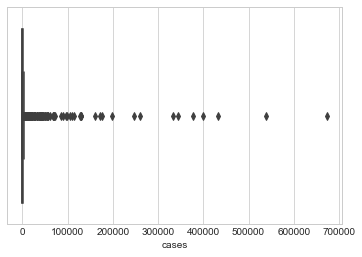

In [17]:
sns.boxplot(x =df['cases'])

<AxesSubplot:xlabel='density_per_km', ylabel='Density'>

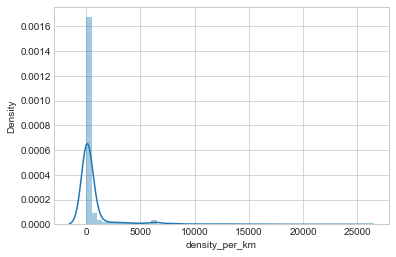

In [18]:
# kernel density
sns.distplot(a=df['density_per_km'])

<AxesSubplot:xlabel='cases', ylabel='Density'>

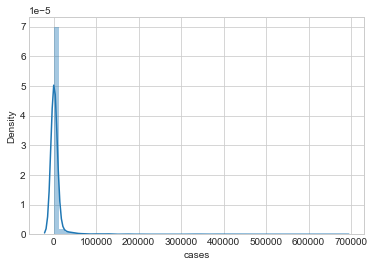

In [19]:
sns.distplot(a=df['cases'])

Text(0, 0.5, 'Density per km')

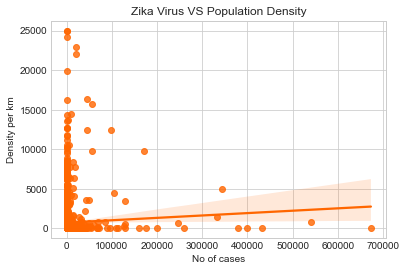

In [33]:
# To double-check the strength of this relationship
# one regression line
sns.regplot(y=df['density_per_km'], x=df['cases'],color='#FF6600')
plt.title('Zika Virus VS Population Density')
plt.xlabel('No of cases')
plt.ylabel('Density per km')

<AxesSubplot:>

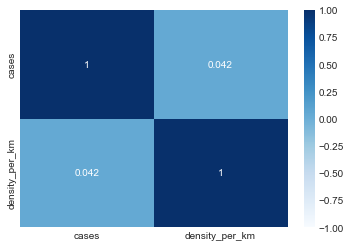

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1) 

Conclusion :
1. There is no relationship between zika virus cases and population density per km.
2. Hence, Zikavirus does not spread because of strength of the people living in an area per square kilometer.